When Imbalanced data then precision is more imp than accuracy 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf

In [4]:
import chardet

with open(r"C:\Users\Yash\Desktop\Projects\Spam_Classifier\spam.csv", 'rb') as f:
    result = chardet.detect(f.read())

In [5]:
df=pd.read_csv(r"C:\Users\Yash\Desktop\Projects\Spam_Classifier\spam.csv", encoding=result['encoding'])

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.iloc[1413]

v1                                                         spam
v2            Dear U've been invited to XCHAT. This is our f...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 1413, dtype: object

In [8]:
df.shape

(5572, 5)

In [9]:
#Data Cleaning
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [13]:
df.duplicated().sum()
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

(array([4516.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         653.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

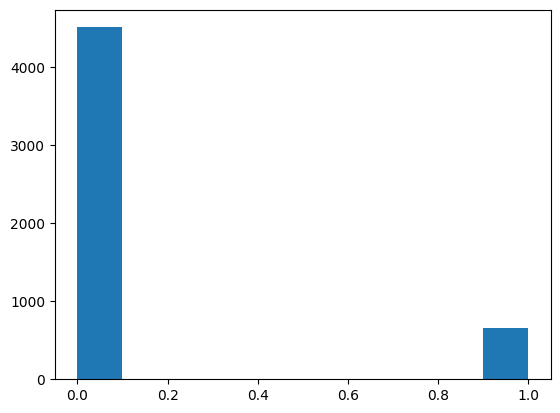

In [16]:
plt.hist(df['label'])

In [17]:
##Imbalanced Dataset
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#number of characters
df['num_characters']=df['message'].apply(len)

C:\Users\Yash\AppData\Local\Temp\ipykernel_5940\2837545805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


In [19]:
df

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
#num of words
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Yash\AppData\Local\Temp\ipykernel_5940\1335918449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
#num of sentences
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Yash\AppData\Local\Temp\ipykernel_5940\481292691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [23]:
#Ham messages
df[df['label']==0].describe()

,label,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
#Spam messages
df[df['label']==1].describe()

,label,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

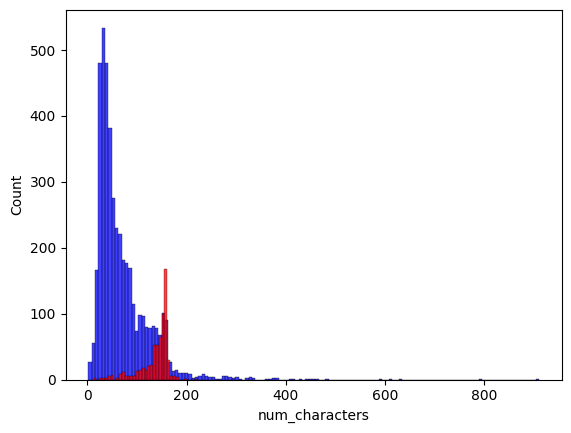

In [25]:
sns.histplot(df[df['label']==0]['num_characters'],color='blue',label='Ham')
sns.histplot(df[df['label']==1]['num_characters'],color='red',label='Spam')

<Axes: xlabel='num_words', ylabel='Count'>

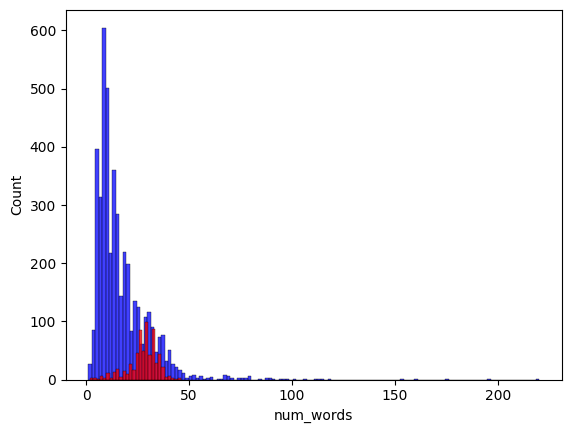

In [26]:
sns.histplot(df[df['label']==0]['num_words'],color='blue',label='Ham')
sns.histplot(df[df['label']==1]['num_words'],color='red',label='Spam')

<Axes: xlabel='num_sentences', ylabel='Count'>

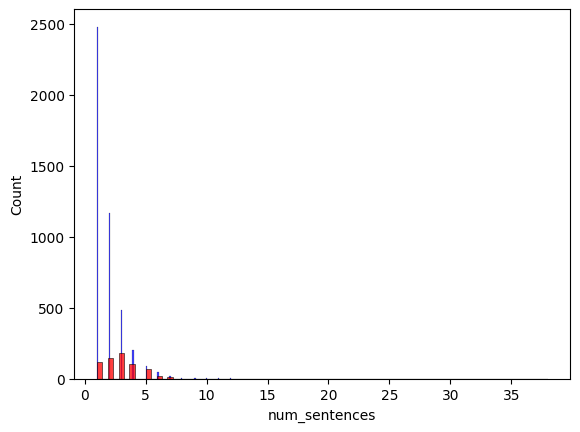

In [27]:
sns.histplot(df[df['label']==0]['num_sentences'],color='blue',label='Ham')
sns.histplot(df[df['label']==1]['num_sentences'],color='red',label='Spam')

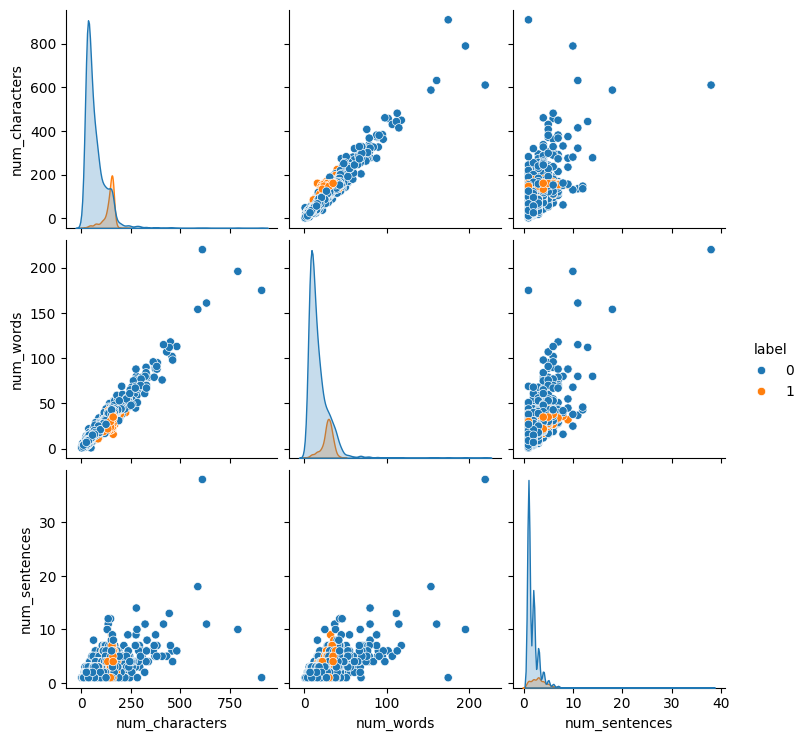

In [28]:
sns.pairplot(df,hue='label')

<Axes: >

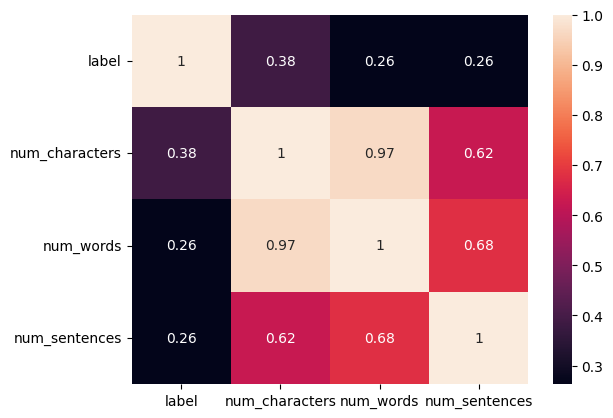

In [29]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [30]:
#As strong co-relation hence keep only 1 column ie num_characters

In [31]:
#Data Preprocessing
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
stem=PorterStemmer()
def tranform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y=[]
    for i in text:
        y.append(stem.stem(i))

    return " ".join(y)

In [32]:
tranform_text('Hi how are you yash and what are you eating?')

'hi yash eat'

In [33]:
df['tranformed_text']=df['message'].apply(tranform_text)


C:\Users\Yash\AppData\Local\Temp\ipykernel_5940\3290397856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranformed_text']=df['message'].apply(tranform_text)


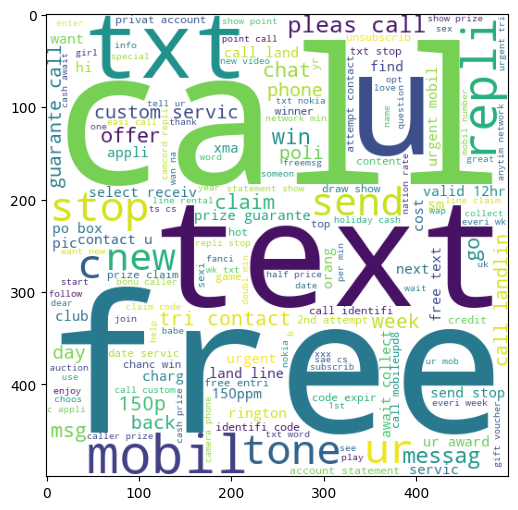

In [34]:
#use dto check the most common words in spam 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(" ".join(df[df['label']==1]['tranformed_text']))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [35]:
spam_corpus=[]
for msg in df[df['label']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

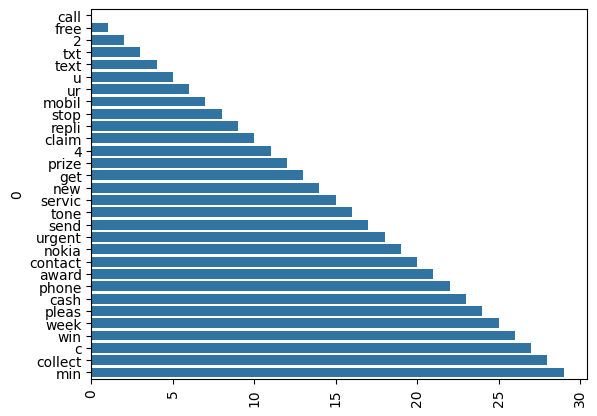

In [36]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()


Model Building

In [37]:
#Naive Bayes performs best generally on text data
df



,label,message,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['tranformed_text']).toarray()
y=df['label'].values

In [55]:
print(X.shape,y.shape)

(5169, 3000) (5169,)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [59]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [60]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [61]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [63]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2) 

In [64]:
clfs={'SVC':svc,
      'KN':knc,
      'NB':mnb,
      'DT':dtc,
      'LR':lrc,
      'RF':rfc,
      'AdaBoost':abc,
      'ETC':etc,
      'GBDT':gbdt,
      'XGB':xgb
    }

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [66]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy is ",current_accuracy)
    print("Precision is ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy is  0.97678916827853
Precision is  0.9548872180451128
For  KN
Accuracy is  0.9042553191489362
Precision is  1.0
For  NB
Accuracy is  0.9729206963249516
Precision is  0.9915966386554622
For  DT
Accuracy is  0.9332688588007737
Precision is  0.8275862068965517
For  LR
Accuracy is  0.9468085106382979
Precision is  0.8688524590163934
For  RF
Accuracy is  0.971953578336557
Precision is  0.9754098360655737
For  AdaBoost
Accuracy is  0.9158607350096711
Precision is  0.8085106382978723
For  ETC
Accuracy is  0.9777562862669246
Precision is  0.9841269841269841
For  GBDT
Accuracy is  0.9468085106382979
Precision is  0.96875
For  XGB
Accuracy is  0.9680851063829787
Precision is  0.9375


In [67]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
7,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
8,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
9,XGB,0.968085,0.937500
4,LR,0.946809,0.868852
3,DT,0.933269,0.827586
6,AdaBoost,0.915861,0.808511


In [69]:
import pickle as pkl
pkl.dump(tfidf,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model.pkl','wb'))